# Data Exploration and Cleaning

In [3]:
import pandas as pd
import numpy as np

In [4]:
df= pd.read_csv("Fraud.csv")

In [5]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [6]:
df.rename(columns={
    'step':'Step',
    'type':'Type',
    'amount':'Amount',
    'nameOrig':'sender name',
    'oldbalanceOrg': 'sender old balance',
    'newbalanceOrig': 'sender new balance',
    'nameDest':'client',
    'oldbalanceDest': 'client old balance',
    'newbalanceDest': 'client new balance',
    'isFraud':'Fraudulent',
    'isFlaggedFraud':'Flagged as Fraudulent'
}, inplace= True)
df

,Step,Type,Amount,sender name,sender old balance,sender new balance,client,client old balance,client new balance,Fraudulent,Flagged as Fraudulent
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [7]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Step                   int64  
 1   Type                   object 
 2   Amount                 float64
 3   sender name            object 
 4   sender old balance     float64
 5   sender new balance     float64
 6   client                 object 
 7   client old balance     float64
 8   client new balance     float64
 9   Fraudulent             int64  
 10  Flagged as Fraudulent  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.describe(include=['object'])

,Type,sender name,client
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [10]:
df.isnull().sum()

Step                     0
Type                     0
Amount                   0
sender name              0
sender old balance       0
sender new balance       0
client                   0
client old balance       0
client new balance       0
Fraudulent               0
Flagged as Fraudulent    0
dtype: int64

In [11]:
df["Fraudulent"]= df["Fraudulent"].apply(str)
fraud_map={"0":"False", "1":"True"}
df["Fraudulent"] = df["Fraudulent"].map(fraud_map)
df["Fraudulent"]

0          False
1          False
2           True
3           True
4          False
           ...  
6362615     True
6362616     True
6362617     True
6362618     True
6362619     True
Name: Fraudulent, Length: 6362620, dtype: object

In [12]:
df["F.0lagged as Fraudulent"]= df["Flagged as Fraudulent"].apply(str)
fraud_map={"0":"False", "1":"True"}
df["Flagged as Fraudulent"] = df["Flagged as Fraudulent"].map(fraud_map)
df["Flagged as Fraudulent"]

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Name: Flagged as Fraudulent, Length: 6362620, dtype: object

In [13]:
df

,Step,Type,Amount,sender name,sender old balance,sender new balance,client,client old balance,client new balance,Fraudulent,Flagged as Fraudulent
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,False,False
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,False,False
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,True,False
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,True,False
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,True,False
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,True,False
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,True,False
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,True,False


In [14]:
df.drop(["sender name","client","sender old balance","client old balance"],axis=1,inplace=True)

In [15]:
df

,Step,Type,Amount,sender new balance,client new balance,Fraudulent,Flagged as Fraudulent
0,1,PAYMENT,9839.64,160296.36,0.00,False,False
1,1,PAYMENT,1864.28,19384.72,0.00,False,False
2,1,TRANSFER,181.00,0.00,0.00,True,False
3,1,CASH_OUT,181.00,0.00,0.00,True,False
4,1,PAYMENT,11668.14,29885.86,0.00,False,False
...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,0.00,339682.13,True,False
6362616,743,TRANSFER,6311409.28,0.00,0.00,True,False
6362617,743,CASH_OUT,6311409.28,0.00,6379898.11,True,False
6362618,743,TRANSFER,850002.52,0.00,0.00,True,False


# EDA

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histogram

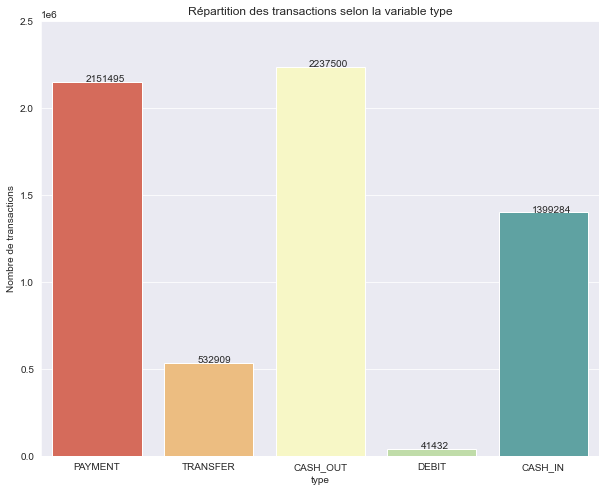

In [17]:
plt.figure(figsize=(10,8))

ax = sns.countplot(x="Type", data=df, palette="Spectral")

plt.title('Répartition des transactions selon la variable type')
plt.xlabel("type")
plt.ylabel("Nombre de transactions")
plt.ylim(0,2500000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300))

In [18]:

for p in ax.patches:
    # ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300))
    print(p.get_x())

-0.4
0.6
1.6
2.6
3.6


TypeError: Vertical orientation requires numeric `y` variable.

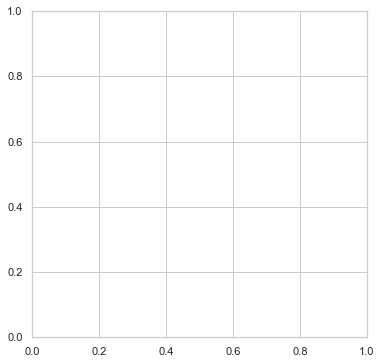

In [19]:
sns.set_theme(style="whitegrid")
#initializing matplotlib figure
f, ax= plt.subplots(figsize=(6,6))

#Loading the data needed
typeFraud= df.sort_values("Type", ascending=False)
typeFraud.drop(["Amount","sender new balance","client new balance","Step"],axis=1,inplace=True)

#plotting types
sns.set_color_codes("pastel")
sns.barplot(y="Type",data=typeFraud,color="b"  )

### Crosstab query

In [21]:
df.rename({
    "Flagged as Fraudulent":"Flagged",
},axis=1,inplace=True)
data ={
    "Type": ["CASH_IN", "CASH_OUT", "DEBIT", "PAYMENT", "TRANSFER"],
    "Total": 0,
    "Total_Fraud":0,
    "Total_Flagged": 0
}
cleanFraud= pd.DataFrame(data)
totalFraud = pd.crosstab(df.Type,df.Fraudulent)
totalFlagged = pd.crosstab(df.Type,df.Flagged)

print(totalFraud,'\n\n',totalFlagged,'\n\n',cleanFraud)

Fraudulent    False  True
Type                     
CASH_IN     1399284     0
CASH_OUT    2233384  4116
DEBIT         41432     0
PAYMENT     2151495     0
TRANSFER     528812  4097 

 Flagged     False  True
Type                   
CASH_IN   1399284     0
CASH_OUT  2237500     0
DEBIT       41432     0
PAYMENT   2151495     0
TRANSFER   532893    16 

        Type  Total  Total_Fraud  Total_Flagged
0   CASH_IN      0            0              0
1  CASH_OUT      0            0              0
2     DEBIT      0            0              0
3   PAYMENT      0            0              0
4  TRANSFER      0            0              0


In [22]:

index=0
for x in cleanFraud.Type:
    cleanFraud["Total"][index]= df.loc[df.Type == x,'Type'].count()
    cleanFraud["Total_Fraud"][index]= totalFraud["True"][index]
    cleanFraud["Total_Flagged"][index]= totalFlagged["True"][index]
    index=index+1
cleanFraud

C:\Users\Arfizato\AppData\Local\Temp/ipykernel_27484/1151661894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanFraud["Total"][index]= df.loc[df.Type == x,'Type'].count()
C:\Users\Arfizato\AppData\Local\Temp/ipykernel_27484/1151661894.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanFraud["Total_Fraud"][index]= totalFraud["True"][index]
C:\Users\Arfizato\AppData\Local\Temp/ipykernel_27484/1151661894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,Type,Total,Total_Fraud,Total_Flagged
0,CASH_IN,1399284,0,0
1,CASH_OUT,2237500,4116,0
2,DEBIT,41432,0,0
3,PAYMENT,2151495,0,0
4,TRANSFER,532909,4097,16


Now that we have the dataframe we need to draw the bar plot, we're going back to it

In [24]:

index=0
## multiplying the values by 10 to make them visible compared to the real
for x in cleanFraud.Total_Fraud:
    # print(x*100,x)
    cleanFraud["Total_Fraud"][index]=x*10
    index=index+1
cleanFraud

C:\Users\Arfizato\AppData\Local\Temp/ipykernel_27484/1550588061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanFraud["Total_Fraud"][index]=x*10


,Type,Total,Total_Fraud,Total_Flagged
0,CASH_IN,1399284,0,0
1,CASH_OUT,2237500,41160,0
2,DEBIT,41432,0,0
3,PAYMENT,2151495,0,0
4,TRANSFER,532909,40970,16


### Horizontal bar Plots

10


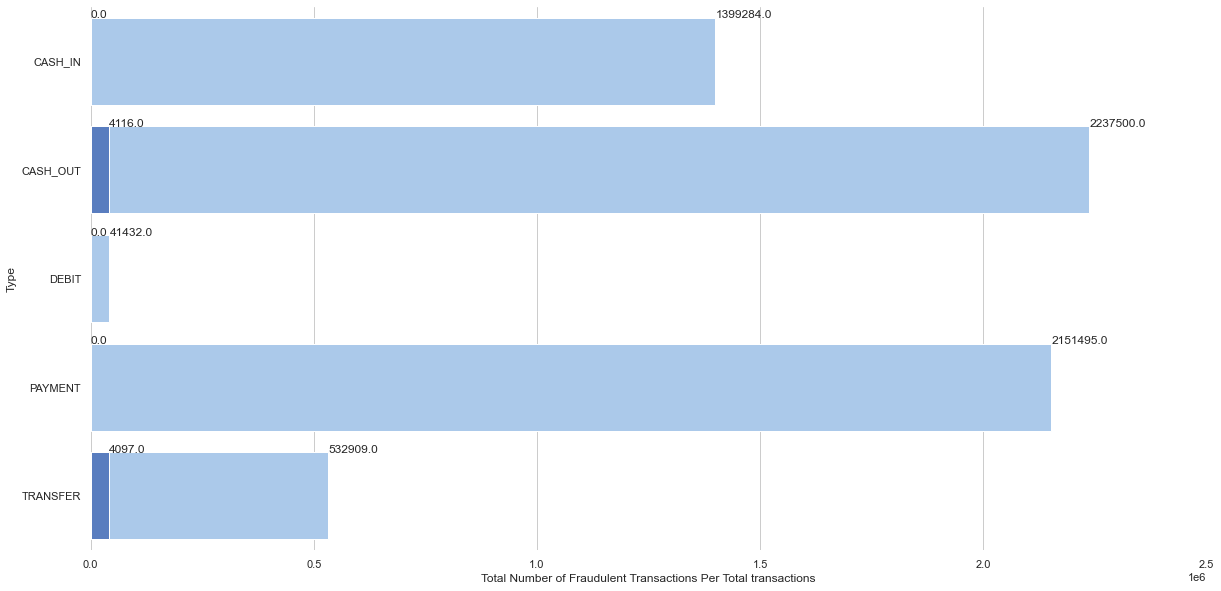

In [31]:
sns.set_theme(style="whitegrid")
#initializing matplotlib figure
f, ax= plt.subplots(figsize=(20,10))

#plotting types
sns.set_color_codes("pastel")
sns.barplot(x="Total" ,y="Type",data=cleanFraud,color="b"  )

#plotting fraud
sns.set_color_codes("muted")
sns.barplot(x="Total_Fraud", y="Type", data= cleanFraud, color="b" )

# more information
ax.set(xlim=(0,2500000), xlabel="Total Number of Fraudulent Transactions Per Total transactions" )
sns.despine(left=True, bottom=True)

index=0
print(len(ax.patches))
for p in ax.patches:
    # ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300))
    if index< len(ax.patches)/2:
        ax.annotate((p.get_width()), (p.get_width()+700,p.get_y()))
    else:
        ax.annotate((p.get_width()/10), (p.get_width(),p.get_y()))

        # print(p.get_width(),"\n")
    index+=1

### Pie Chart

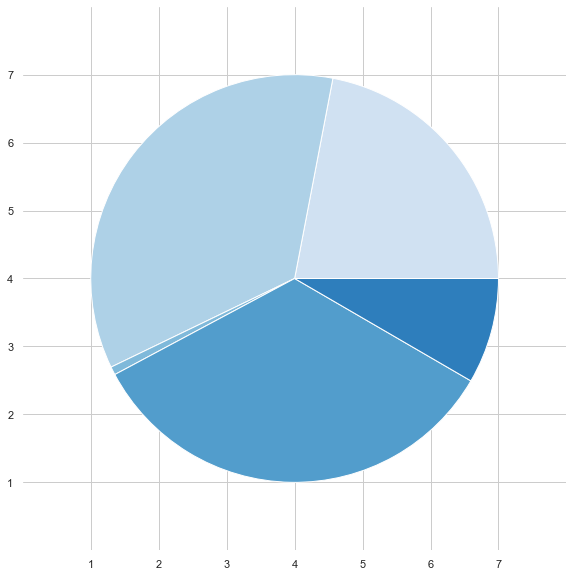

In [26]:
#pie chart
import matplotlib.pyplot as pltt


colors = pltt.get_cmap("Blues")(np.linspace(0.2,0.7,len(cleanFraud.Type)))

#plotting
fig, ax= plt.subplots(figsize=(10,10) )
ax.pie(cleanFraud.Total, colors=colors, radius=3, center=(4,4), wedgeprops={"linewidth":1, "edgecolor":"white"},frame=False )

ax.set(xlim=(0,8),xticks=np.arange(1,8),
       ylim=(0,8),yticks=np.arange(1,8))
plt.show()

### Step LinePlot

In [27]:

tab = pd.crosstab(df.Step,df.Type)
tab.sort_values("Step")

Type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
Step,,,,,
1,527,388,148,1369,276
2,203,104,71,555,81
3,124,52,25,316,35
4,136,77,16,294,42
5,131,61,24,419,30
...,...,...,...,...,...
739,0,5,0,0,5
740,0,3,0,0,3
741,0,11,0,0,11


<AxesSubplot:xlabel='Step'>

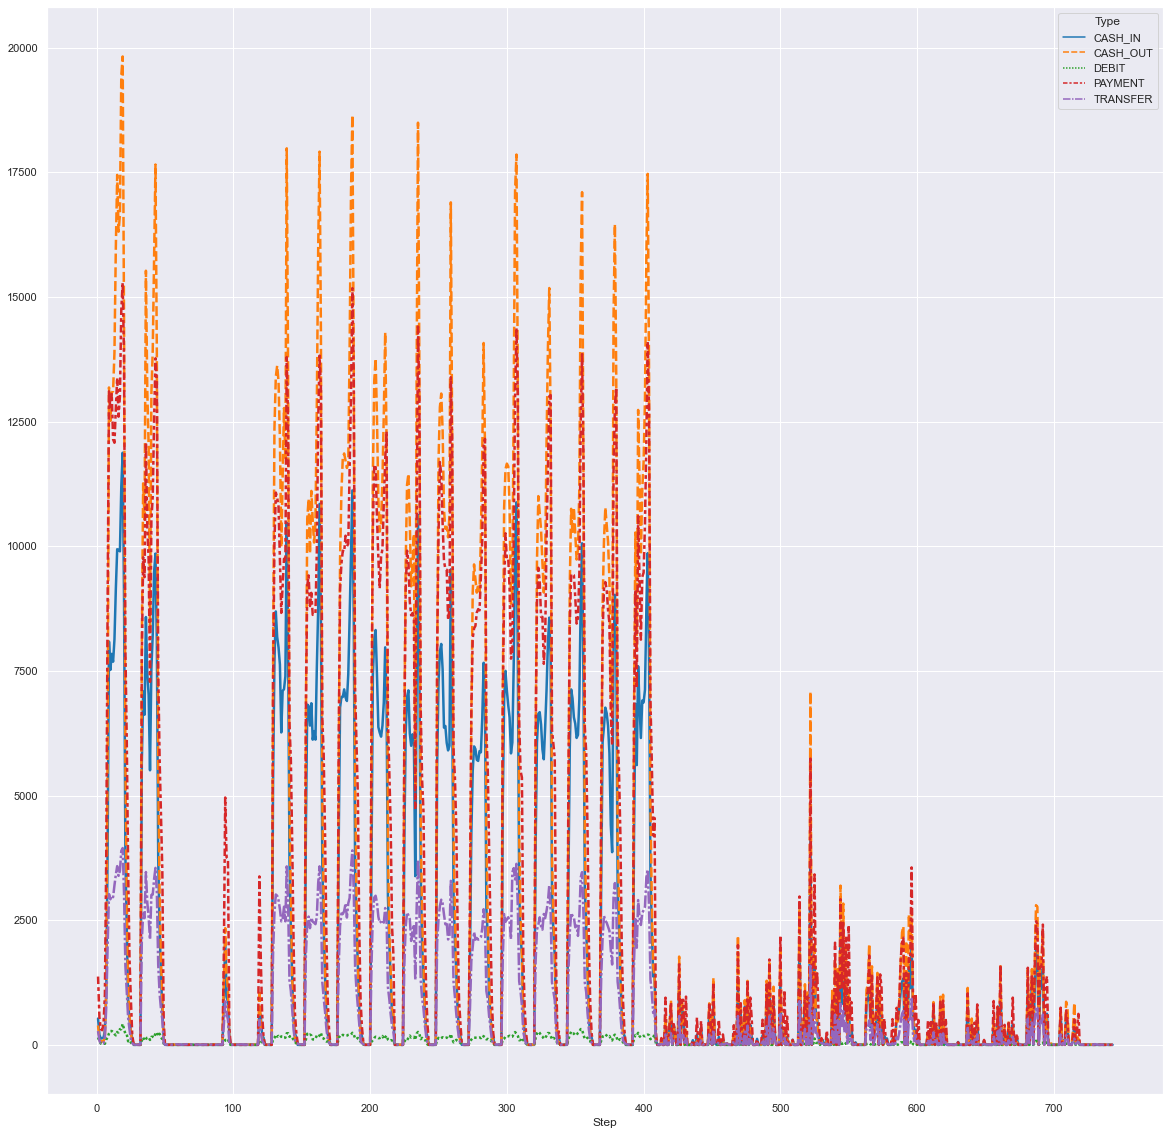

In [28]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,20)})
sns.lineplot(data=tab, palette="tab10", linewidth=2.5)

### idk bruh

In [41]:
df

,Step,Type,Amount,sender new balance,client new balance,Fraudulent,Flagged
0,1,PAYMENT,9839.64,160296.36,0.00,False,False
1,1,PAYMENT,1864.28,19384.72,0.00,False,False
2,1,TRANSFER,181.00,0.00,0.00,True,False
3,1,CASH_OUT,181.00,0.00,0.00,True,False
4,1,PAYMENT,11668.14,29885.86,0.00,False,False
...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,0.00,339682.13,True,False
6362616,743,TRANSFER,6311409.28,0.00,0.00,True,False
6362617,743,CASH_OUT,6311409.28,0.00,6379898.11,True,False
6362618,743,TRANSFER,850002.52,0.00,0.00,True,False
